# Project summary


Company B is a B2B exchange found in 1995 where clients can trade with each other without the need of cash. Company B will act as a third party ledger recorder and also a marketing channel to promote members. Company B will charge a % of each transaction as success fee and this will be Company B’s revenue.

Company B employs a number of account managers to look after these accounts and facilitate trading as the mode trading -> the more profit.
Account managers KPI are based on service call, service visit or annual review of each account. 
### Questions:
Recently our director is interested to find out if we could predict our revenue based on account managers’ input as some of his questions below:

1. Can we find any good predictor for number of Closures/ % fee collection using account manager activities or info in given dataset?	
2. Are account manager’s activities a good indicator for revenue?
3. Is floating interest a good indicator for revenue?
4. Does transaction fee impact revenue?
5. Can we predict revenue next 6 months?

Data of most variables: total accounts, transactions, volume, account manager activities … are available from company portal as CSV and can be download to process. However data are formatted in presentation ready form so it will need to be processed and converted to proper format for each value.



### Import required libraries

In [800]:
# Part 1
import pandas as pd
import numpy as np
# Part 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Part 3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#Part 4
#Model 1

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
#Mode 2
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
#pip install git+https://github.com/tensorflow/docs
import tensorflow_docs.plots
import tensorflow_docs.modeling


#Part 4 Model
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
from keras.layers import LSTM

import warnings
warnings.filterwarnings('ignore')

# Step 1: Extract - Transform - Loading

## Data extraction

In [137]:
# Read data file revenue.csv which download from company dashboard with pandas
df=pd.read_csv('revenue.csv')

In [138]:
# check the data quickly to make sure it is the right file
df.tail()

,Year,Month,A Status Account Count,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,...,Sales Volume,TV Transaction Processed Count,Closure Count,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance
329,NaN,May,5073,12,2576,3.192582e+05,0.620230,3494,551.0,968.0,...,2.232797e+06,7394,19.0,4.507436e+06,1773,802,1521,1119,5267,9.014108e+07
330,NaN,June,5072,39,2460,4.434937e+05,0.738423,4260,466.0,715.0,...,3.067886e+06,10369,27.0,6.135884e+06,1985,978,1742,1351,6841,8.947853e+07
331,NaN,July,5057,75,2643,5.756627e+05,0.816795,5305,597.0,951.0,...,3.928258e+06,12323,30.0,8.053953e+06,2097,1151,1907,1522,7997,8.926536e+07
332,2020 Total,NaN,60980,361,16316,2.816847e+06,0.598382,31591,3301.0,6102.0,...,1.945326e+07,70167,NaN,3.968876e+07,13799,6629,12112,9235,46898,7.225113e+08
333,Grand Total,NaN,1862464,34337,691530,2.326754e+08,0.754963,3230770,161763.0,248038.0,...,1.830398e+09,7842432,21447.0,3.736002e+09,976766,593887,903759,755072,5341020,2.013616e+10


In [139]:
# check all columns we have
df.columns

Index(['Year', 'Month', 'A Status Account Count',
       'Annual Review Month Unique Count', 'Service Month Unique Count', 'TFG',
       'Fee Collected %', 'Frequent Trading Customer Partner Count',
       'Activity Email Count', 'Activity Left Message Count',
       'Annual Review Count', 'Service Count', 'Visit Drop In Count',
       'Fair Trading Strike Count', 'Visit Service Count', 'Search Count',
       'Search No Match Count', 'Purchase Volume', 'Sales Volume',
       'TV Transaction Processed Count', 'Closure Count',
       'Billable Month Volume', 'Traded100 Account Count',
       'Traded1000 Account Count', 'Traded200 Account Count',
       'Traded500 Account Count', 'Trading Customer Partner Count',
       'Closing Available Balance'],
      dtype='object')

In [140]:
# check datatype
df.dtypes

Year                                        object
Month                                       object
A Status Account Count                       int64
Annual Review Month Unique Count             int64
Service Month Unique Count                   int64
TFG                                        float64
Fee Collected %                            float64
Frequent Trading Customer Partner Count      int64
Activity Email Count                       float64
Activity Left Message Count                float64
Annual Review Count                        float64
Service Count                              float64
Visit Drop In Count                        float64
Fair Trading Strike Count                  float64
Visit Service Count                        float64
Search Count                               float64
Search No Match Count                      float64
Purchase Volume                            float64
Sales Volume                               float64
TV Transaction Processed Count 

## Data transform

Datatype is looking good. However we can see our dataset doesn't have proper datetime columns. So we will go ahead and construct a proper datetime columns by filling empty year. Then we will need to remove duplicated row (total row end of each year)



In [141]:
# Contruct all missing year value by using fill NaN with previous row value
df['Year']=df['Year'].fillna(method='ffill')

In [142]:
# remove all total columns
df=df[~df.Year.str.contains("Total")]

In [143]:
# construct year- month columns
df['date']=df['Month'] + " - " + df['Year']
df['date']=pd.to_datetime(df['date'])

In [144]:
# check our new data
df.tail(5)

,Year,Month,A Status Account Count,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,...,TV Transaction Processed Count,Closure Count,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date
327,2020,March,5112,69,2413,459012.3525,0.627050,4849,477.0,767.0,...,11069,23.0,6509895.810,2095,1011,1879,1438,7434,90783901.22,2020-03-01
328,2020,April,5015,6,2269,170373.1300,0.766216,1892,423.0,919.0,...,3630,20.0,2298004.410,1215,482,1029,728,2772,90527026.22,2020-04-01
329,2020,May,5073,12,2576,319258.2300,0.620230,3494,551.0,968.0,...,7394,19.0,4507435.560,1773,802,1521,1119,5267,90141084.02,2020-05-01
330,2020,June,5072,39,2460,443493.7400,0.738423,4260,466.0,715.0,...,10369,27.0,6135883.593,1985,978,1742,1351,6841,89478534.02,2020-06-01
331,2020,July,5057,75,2643,575662.7375,0.816795,5305,597.0,951.0,...,12323,30.0,8053952.985,2097,1151,1907,1522,7997,89265359.03,2020-07-01


Next, we will go ahead and check for all columns with NaN values


In [145]:
# check for any columns with NaN value
df.loc[:, df.isna().any()]

,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,Visit Drop In Count,Fair Trading Strike Count,Visit Service Count,Search Count,Search No Match Count,Closure Count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
...,...,...,...,...,...,...,...,...,...,...
327,477.0,767.0,70.0,3028.0,28.0,0.0,253.0,56236.0,3882.0,23.0
328,423.0,919.0,6.0,2713.0,0.0,0.0,9.0,11293.0,1189.0,20.0
329,551.0,968.0,12.0,3278.0,7.0,0.0,68.0,57704.0,3287.0,19.0
330,466.0,715.0,39.0,3281.0,22.0,0.0,220.0,90247.0,4702.0,27.0


In [146]:
# Loop through all columns and calculate total missing values NaN each columns
for col in df.columns:
    print (col,' has a total of ',df[col].isna().sum(),' NaN values')

Year  has a total of  0  NaN values
Month  has a total of  0  NaN values
A Status Account Count  has a total of  0  NaN values
Annual Review Month Unique Count  has a total of  0  NaN values
Service Month Unique Count  has a total of  0  NaN values
TFG  has a total of  0  NaN values
Fee Collected %  has a total of  0  NaN values
Frequent Trading Customer Partner Count  has a total of  0  NaN values
Activity Email Count  has a total of  62  NaN values
Activity Left Message Count  has a total of  62  NaN values
Annual Review Count  has a total of  62  NaN values
Service Count  has a total of  62  NaN values
Visit Drop In Count  has a total of  62  NaN values
Fair Trading Strike Count  has a total of  62  NaN values
Visit Service Count  has a total of  62  NaN values
Search Count  has a total of  250  NaN values
Search No Match Count  has a total of  250  NaN values
Purchase Volume  has a total of  0  NaN values
Sales Volume  has a total of  0  NaN values
TV Transaction Processed Count  h

In [147]:
# Get % of missing value over total rows
print (df['Search No Match Count'].isna().values.sum()/len(df))

0.8143322475570033


As we can see Search columns has the highest number of NaN due to this tool only came availalbe in 2016.
In this study, we will decide to remove this feature due to more than 80% of values are missing.


In [148]:
# delete this feature
del df['Search Count']
del df['Search No Match Count']

In [149]:
# Loop through all columns and calculate total missing values NaN each columns
for col in df.columns:
    print (col,' has a total of ',df[col].isna().sum(),' NaN values')

Year  has a total of  0  NaN values
Month  has a total of  0  NaN values
A Status Account Count  has a total of  0  NaN values
Annual Review Month Unique Count  has a total of  0  NaN values
Service Month Unique Count  has a total of  0  NaN values
TFG  has a total of  0  NaN values
Fee Collected %  has a total of  0  NaN values
Frequent Trading Customer Partner Count  has a total of  0  NaN values
Activity Email Count  has a total of  62  NaN values
Activity Left Message Count  has a total of  62  NaN values
Annual Review Count  has a total of  62  NaN values
Service Count  has a total of  62  NaN values
Visit Drop In Count  has a total of  62  NaN values
Fair Trading Strike Count  has a total of  62  NaN values
Visit Service Count  has a total of  62  NaN values
Purchase Volume  has a total of  0  NaN values
Sales Volume  has a total of  0  NaN values
TV Transaction Processed Count  has a total of  0  NaN values
Closure Count  has a total of  1  NaN values
Billable Month Volume  has 

In [150]:
# Get % of missing value over total rows
print (df['Activity Email Count'].isna().values.sum()/len(df))

0.20195439739413681


The next features has 21% of values missing is Account manager activities. This can be explained by in the first 5 years from 1995 to 2000, the company hasn't got the KPI system for account manager and it only became available in 2000.
In this study, we will not taking the approach to replace missing values by mean() or median of this feature due to the fact that in the first few years, data quality might not be as accurate as after 2000. So we will remove this NaN value and only study from 2000 towards.

In [151]:
# check our data before remove all NaN values
df.tail()

,Year,Month,A Status Account Count,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,...,TV Transaction Processed Count,Closure Count,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date
327,2020,March,5112,69,2413,459012.3525,0.627050,4849,477.0,767.0,...,11069,23.0,6509895.810,2095,1011,1879,1438,7434,90783901.22,2020-03-01
328,2020,April,5015,6,2269,170373.1300,0.766216,1892,423.0,919.0,...,3630,20.0,2298004.410,1215,482,1029,728,2772,90527026.22,2020-04-01
329,2020,May,5073,12,2576,319258.2300,0.620230,3494,551.0,968.0,...,7394,19.0,4507435.560,1773,802,1521,1119,5267,90141084.02,2020-05-01
330,2020,June,5072,39,2460,443493.7400,0.738423,4260,466.0,715.0,...,10369,27.0,6135883.593,1985,978,1742,1351,6841,89478534.02,2020-06-01
331,2020,July,5057,75,2643,575662.7375,0.816795,5305,597.0,951.0,...,12323,30.0,8053952.985,2097,1151,1907,1522,7997,89265359.03,2020-07-01


In [152]:
# Remove all NaN value
df = df[~df.isna().any(axis=1)]

In [153]:
# check final data shape
df.shape

(245, 27)

In [154]:
# Now we check for first 5 and bottom 5 rows of dataframe
df.head()

,Year,Month,A Status Account Count,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,...,TV Transaction Processed Count,Closure Count,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date
66,2000,February,3345,0,0,512760.98,0.795961,7258,0.0,0.0,...,17907,57.0,9.303623e+06,2243,1424,2110,1786,12592,24587851.24,2000-02-01
68,2000,April,3343,0,0,489407.27,0.751309,7448,6.0,0.0,...,17209,30.0,8.906479e+06,2306,1489,2179,1828,12628,26308623.30,2000-04-01
69,2000,May,3591,0,0,705151.59,0.795144,8188,35.0,0.0,...,22837,64.0,1.176434e+07,2529,1776,2407,2119,15858,28129949.79,2000-05-01
70,2000,June,3703,0,0,599442.24,0.790643,6694,18.0,0.0,...,21423,57.0,1.042658e+07,2472,1617,2323,2002,15404,28490604.70,2000-06-01
71,2000,July,4148,0,0,705770.43,0.765749,9104,10.0,0.0,...,21941,50.0,1.180272e+07,2778,1776,2606,2232,16021,29399982.36,2000-07-01


In [163]:
# check last 5 rows
df.tail()

,Year,Month,A Status Account Count,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,...,TV Transaction Processed Count,Closure Count,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date
327,2020,March,5112,69,2413,459012.3525,0.627050,4849,477.0,767.0,...,11069,23.0,6509895.810,2095,1011,1879,1438,7434,90783901.22,2020-03-01
328,2020,April,5015,6,2269,170373.1300,0.766216,1892,423.0,919.0,...,3630,20.0,2298004.410,1215,482,1029,728,2772,90527026.22,2020-04-01
329,2020,May,5073,12,2576,319258.2300,0.620230,3494,551.0,968.0,...,7394,19.0,4507435.560,1773,802,1521,1119,5267,90141084.02,2020-05-01
330,2020,June,5072,39,2460,443493.7400,0.738423,4260,466.0,715.0,...,10369,27.0,6135883.593,1985,978,1742,1351,6841,89478534.02,2020-06-01
331,2020,July,5057,75,2643,575662.7375,0.816795,5305,597.0,951.0,...,12323,30.0,8053952.985,2097,1151,1907,1522,7997,89265359.03,2020-07-01


In our study we are interested to analyse the impact of floating interest rate also. So next we will import interest rate data which is download from Reserve Bank of NZ.


In [164]:
#load interest data
df2=pd.read_csv('interest.csv')

In [166]:
#check data quickly
df2.tail(2)

,Time,Floating rate,2 year fixed rate
264,Jun-20,4.6,3.7
265,Jul-20,4.6,3.7


Next we will need to reformat datetime columns before we can concate 2 dataframes


In [167]:
# Add date
df2['Time'] = '1-' + df2['Time'].astype(str)
df2['Time']=pd.to_datetime(df2['Time'], format='%d-%b-%y')

In [168]:
# we will rename to date before merge 2 table
df2.rename(columns={'Time':'date'}, inplace=True)
df2.head()

,date,Floating rate,2 year fixed rate
0,1998-06-01,11.2,9.8
1,1998-07-01,10.1,9.0
2,1998-08-01,9.1,8.3
3,1998-09-01,8.2,7.9
4,1998-10-01,7.2,7.2


In [173]:
# we will join 2 table to get final dataframe
df3=pd.merge(df,df2, on='date')
# rename A Status account count to total accounts
df3.rename(columns={'Time':'date'}, inplace=True)

In [174]:
# delete old year month 
del df3['Year']
del df3['Month']

In [175]:
# rename A Status account count to total accounts
df3.rename(columns={'A Status Account Count':'Total accounts'}, inplace=True)

In [176]:
# check the final DF
df3.tail()

,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date,Floating rate,2 year fixed rate
240,5112,69,2413,459012.3525,0.627050,4849,477.0,767.0,70.0,3028.0,...,6509895.810,2095,1011,1879,1438,7434,90783901.22,2020-03-01,4.8,4.2
241,5015,6,2269,170373.1300,0.766216,1892,423.0,919.0,6.0,2713.0,...,2298004.410,1215,482,1029,728,2772,90527026.22,2020-04-01,4.8,4.2
242,5073,12,2576,319258.2300,0.620230,3494,551.0,968.0,12.0,3278.0,...,4507435.560,1773,802,1521,1119,5267,90141084.02,2020-05-01,4.8,3.9
243,5072,39,2460,443493.7400,0.738423,4260,466.0,715.0,39.0,3281.0,...,6135883.593,1985,978,1742,1351,6841,89478534.02,2020-06-01,4.6,3.7
244,5057,75,2643,575662.7375,0.816795,5305,597.0,951.0,75.0,3550.0,...,8053952.985,2097,1151,1907,1522,7997,89265359.03,2020-07-01,4.6,3.7


Finally we will double check if all datatypes are in correct format

In [177]:
df3.dtypes

Total accounts                                      int64
Annual Review Month Unique Count                    int64
Service Month Unique Count                          int64
TFG                                               float64
Fee Collected %                                   float64
Frequent Trading Customer Partner Count             int64
Activity Email Count                              float64
Activity Left Message Count                       float64
Annual Review Count                               float64
Service Count                                     float64
Visit Drop In Count                               float64
Fair Trading Strike Count                         float64
Visit Service Count                               float64
Purchase Volume                                   float64
Sales Volume                                      float64
TV Transaction Processed Count                      int64
Closure Count                                     float64
Billable Month

 Save to new file for later reuse

In [194]:
# Save dataframe to data.csv file
df3.to_csv('data.csv',index=False)

## Data loading

Now lets load our data for our analysis

In [262]:
#read with pandas 
data=pd.read_csv('data.csv')

In [263]:
#print first 2 rows
data.head(2)

,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date,Floating rate,2 year fixed rate
0,3345,0,0,512760.98,0.795961,7258,0.0,0.0,0.0,0.0,...,9303622.659,2243,1424,2110,1786,12592,24587851.24,2000-02-01,7.5,8.6
1,3343,0,0,489407.27,0.751309,7448,6.0,0.0,0.0,0.0,...,8906479.081,2306,1489,2179,1828,12628,26308623.30,2000-04-01,8.0,8.5


# Step 2: Feature Engineering

## Feature creation

As our analysis we interested finding the relationship between account manager activities and revenue.
There is also a significant growth in number of clients during the period. So we will create new average value of activity = total activities/ total clients to reduce the impact of growth

In [264]:
# create fee columns
data['Transaction fee']=data['TFG']/data['Billable Month Volume']*100

# create fee columns
data['% service']=(data['Annual Review Count']+data['Visit Drop In Count']+data['Service Count']+data['Visit Service Count'])/data['Total accounts']

# create Velocity of T
data['velocity']=data['Billable Month Volume']/data['Closing Available Balance']
                      
# Frequent trade partner ratio
data['Frequent trade partner ratio']=data['Trading Customer Partner Count']/data['Total accounts']  
                                          
# Revenue per account
data['TFG per account']=data['TFG']/data['Total accounts']                                            
                                          
                                          

In [265]:
# We will divide Purchase Volume, Sales Volume, Billable Month Volume, Closing Available Balance by 1000 for better reading

data['Billable Month Volume']=data['Billable Month Volume']/1000
data['Sales Volume']=data['Sales Volume']/1000
data['Purchase Volume']=data['Purchase Volume']/1000
data['Closing Available Balance']=data['Closing Available Balance']/1000


In [266]:
#print last 2 rows 
data.tail(2)


,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Trading Customer Partner Count,Closing Available Balance,date,Floating rate,2 year fixed rate,Transaction fee,% service,velocity,Frequent trade partner ratio,TFG per account
243,5072,39,2460,443493.7400,0.738423,4260,466.0,715.0,39.0,3281.0,...,6841,89478.53402,2020-06-01,4.6,3.7,7.227871,0.702287,0.068574,1.348778,87.439618
244,5057,75,2643,575662.7375,0.816795,5305,597.0,951.0,75.0,3550.0,...,7997,89265.35903,2020-07-01,4.6,3.7,7.147580,0.781491,0.090225,1.581372,113.834830


In [267]:
#double check datatype before moving forward
data.dtypes

Total accounts                               int64
Annual Review Month Unique Count             int64
Service Month Unique Count                   int64
TFG                                        float64
Fee Collected %                            float64
Frequent Trading Customer Partner Count      int64
Activity Email Count                       float64
Activity Left Message Count                float64
Annual Review Count                        float64
Service Count                              float64
Visit Drop In Count                        float64
Fair Trading Strike Count                  float64
Visit Service Count                        float64
Purchase Volume                            float64
Sales Volume                               float64
TV Transaction Processed Count               int64
Closure Count                              float64
Billable Month Volume                      float64
Traded100 Account Count                      int64
Traded1000 Account Count       

## Feature selection
We will try 3 different techniques to select our feature
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

### 1. Unnivariate Selection

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.



In [268]:
# Copy to new dataframe
datab=data.copy()

In [269]:
#create X, y
X = datab.iloc[:,~datab.columns.isin(['date', 'Billable Month Volume'])]  #independent columns
y = datab['Billable Month Volume']    #target column revenue
#convert y to int
y=y.astype('int')

In [270]:
y

0       9303
1       8906
2      11764
3      10426
4      11802
       ...  
240     6509
241     2298
242     4507
243     6135
244     8053
Name: Billable Month Volume, Length: 245, dtype: int64

In [271]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                      Specs         Score
3                                       TFG  1.356861e+07
22                Closing Available Balance  1.629484e+06
15           TV Transaction Processed Count  5.483915e+05
21           Trading Customer Partner Count  3.985317e+05
9                             Service Count  2.872289e+05
5   Frequent Trading Customer Partner Count  2.187540e+05
2                Service Month Unique Count  1.771769e+05
14                             Sales Volume  1.322379e+05
13                          Purchase Volume  1.279354e+05
0                            Total accounts  1.148623e+05


### 2. Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.03468422 0.03308408 0.03498553 0.03930111 0.0319103  0.03530196
 0.03361944 0.03418801 0.03135126 0.03404473 0.02990757 0.00299236
 0.03623955 0.03865892 0.03647668 0.03619729 0.03392681 0.03420215
 0.03637377 0.0358506  0.03203125 0.03591511 0.03459387 0.03119592
 0.03226264 0.03547999 0.03372556 0.03403603 0.03318015 0.03428316]


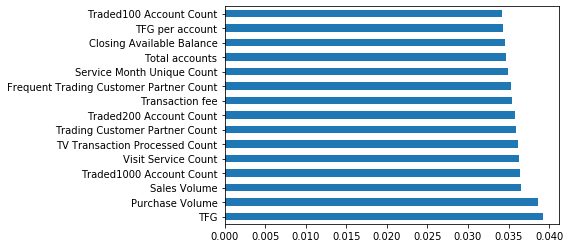

In [273]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### 3. Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [275]:
# We will change order of our y to end of dataframe to read easily
datab['revenue']=datab['Billable Month Volume']
del datab['Billable Month Volume']
datab['Billable Month Volume']=datab['revenue']
del datab['revenue']


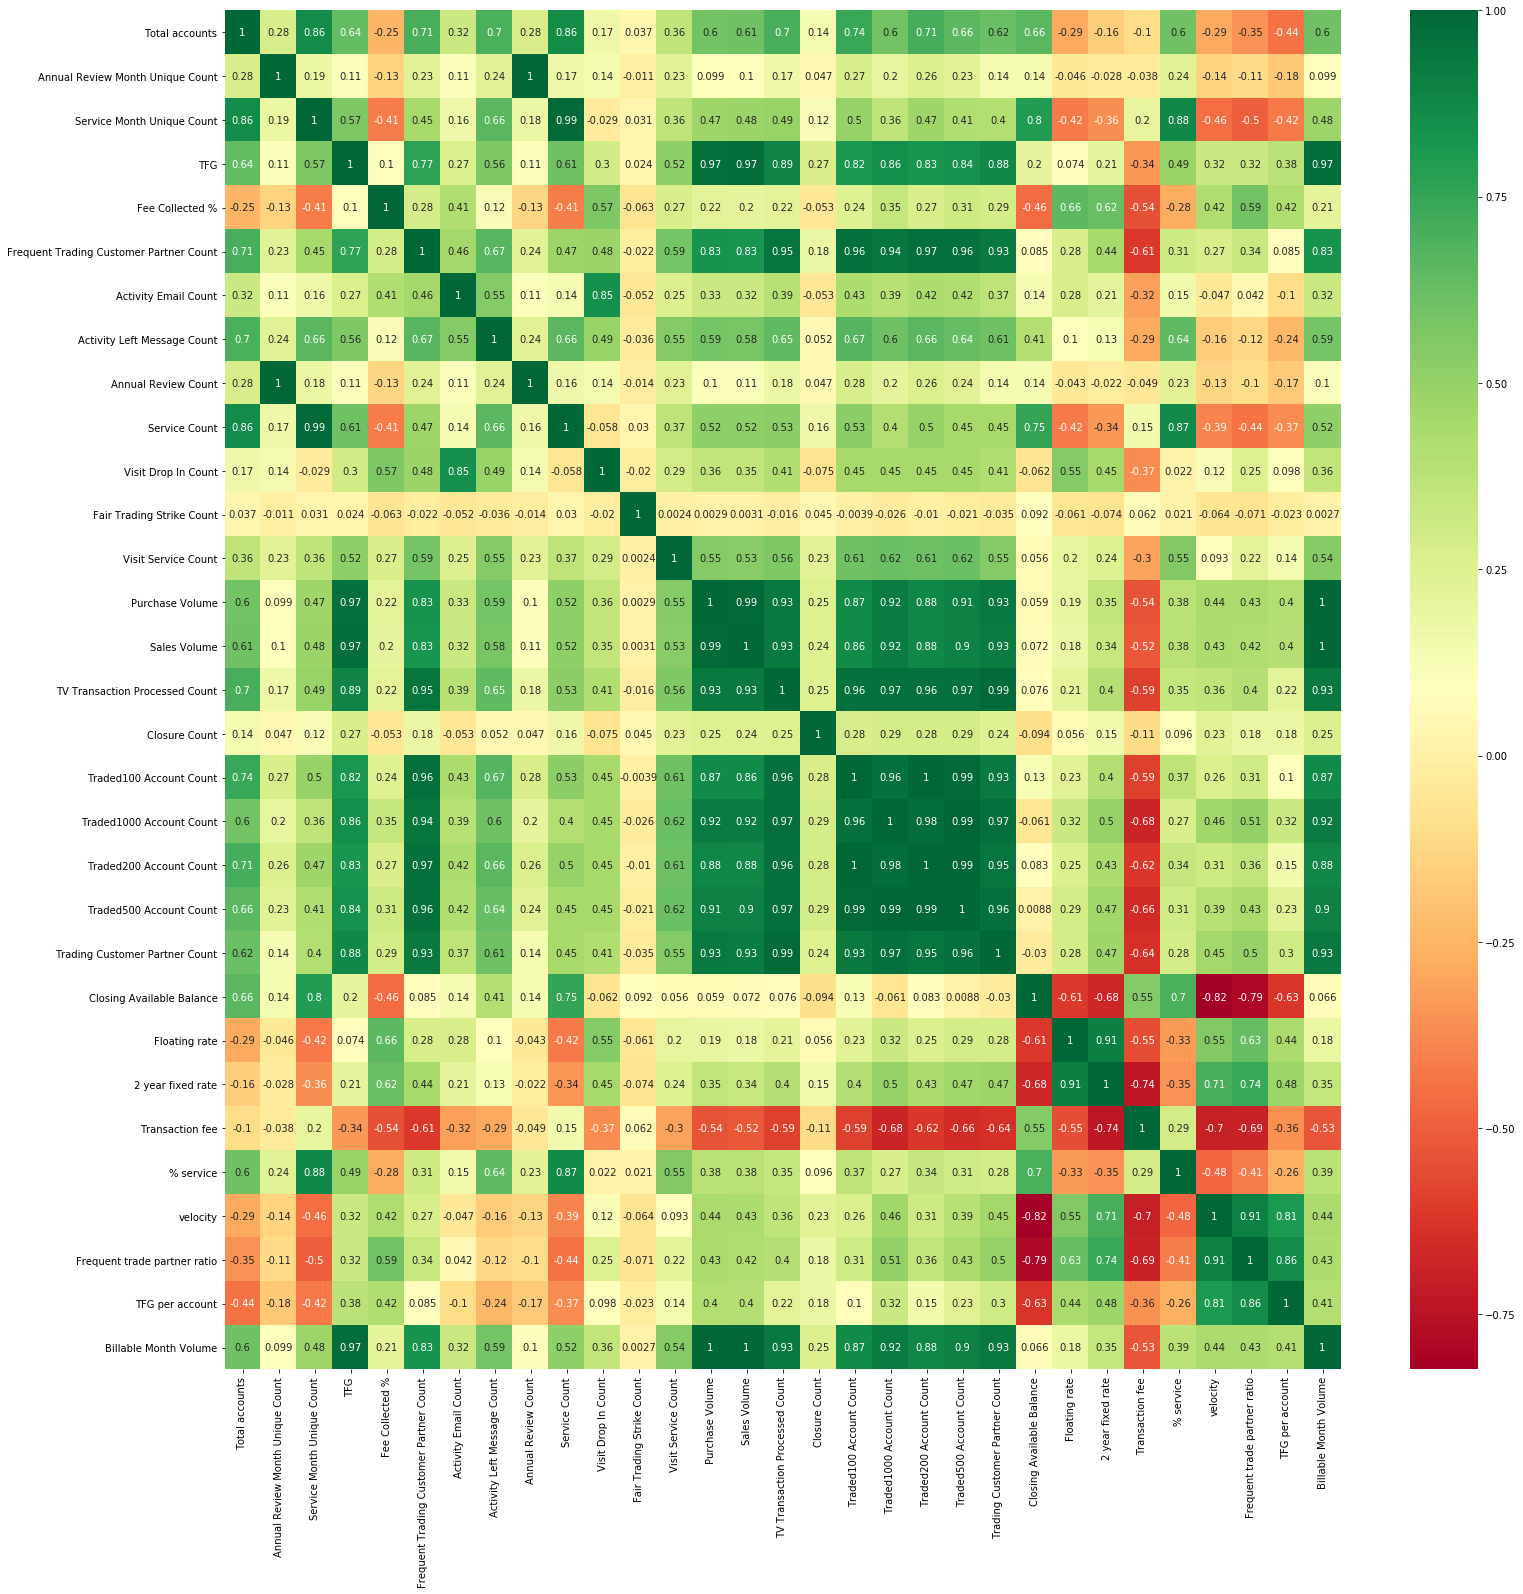

In [276]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = datab.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Summary

In this research we are very interested in % service as this is what we can control from our account managers. So we will decide to pick the following
1. TV Transacion processed count 0.93
2. Service visit 0.54
3. Service count 0.52
4. Total accounts 0.6
5. Transaction fee 0.53

We do not pick TFG, Purchase, Sales volumn due to the fact that they are another form of Revenue - Billable Month Volume

# Answer
###  1. Can we find any good predictor for number of Closures/ % fee collection using account manager activities or info in given dataset?	

Can we find any good predictor for number of Closures using account manager activities?
From the above matrix we can see that there is no good indicator for Number of account closed based on our given data set.

Service visit <0.25 coeff

But there is a strong relationship (0.57 coeff) between % fee collected with number of Visit Drop In

### 2. Are account manager’s activities a good indicator for revenue?

Yes we can see service visit and service count both have their coeff >0.5

### 3. Is floating interest a good indicator for revenue?

No there is a weak relationship with interest rate, coeff <0.2

### 4. Does transaction fee impact revenue?
Yes there is a strong negative (0.53) relationship between revenue vs fee

## Exploratory Data Analysis


In [283]:
# Get dimensions of our data
datab.shape

(245, 32)

In [284]:
# Summary of our features
datab.describe()

,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Trading Customer Partner Count,Closing Available Balance,Floating rate,2 year fixed rate,Transaction fee,% service,velocity,Frequent trade partner ratio,TFG per account,Billable Month Volume
count,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,7124.391837,140.138776,2822.118367,8.924283e+05,0.751429,12382.946939,660.179592,1012.318367,145.453061,3809.085714,...,20291.448980,79336.772522,7.064898,6.583265,6.385838,0.623512,0.197914,2.919165,128.602730,14128.064978
std,1840.380955,111.009623,1441.820249,2.228066e+05,0.077455,3333.614624,507.514015,473.614637,115.784755,2133.805741,...,5757.321498,23126.795153,1.555791,1.361986,0.476125,0.225666,0.082950,0.789122,29.405607,3879.367750
min,3343.000000,0.000000,0.000000,1.703731e+05,0.535576,1892.000000,0.000000,0.000000,0.000000,0.000000,...,2772.000000,24587.851240,4.600000,3.700000,5.494958,0.000000,0.025385,0.552742,33.972708,2298.004410
25%,5665.000000,62.000000,1562.000000,7.470082e+05,0.703632,10148.000000,291.000000,715.000000,64.000000,1989.000000,...,16895.000000,62227.947250,5.800000,5.400000,6.089006,0.501932,0.134107,2.308419,110.057945,11782.895240
50%,6933.000000,115.000000,2941.000000,8.879426e+05,0.740442,12942.000000,656.000000,1028.000000,119.000000,3712.000000,...,20830.000000,82982.172820,6.400000,6.500000,6.198985,0.660994,0.194992,2.923472,126.664989,14197.880240
75%,8605.000000,188.000000,4034.000000,1.027947e+06,0.800210,14984.000000,905.000000,1378.000000,192.000000,5676.000000,...,23803.000000,100126.733300,8.200000,7.600000,6.960695,0.786122,0.247947,3.563634,148.838925,16625.137010
max,11203.000000,669.000000,5569.000000,1.506060e+06,0.918452,19031.000000,2800.000000,2016.000000,684.000000,8860.000000,...,35423.000000,112316.244700,10.700000,9.600000,7.513969,1.087262,0.524645,5.024648,230.750244,24637.096760


### Distribution of Revenue


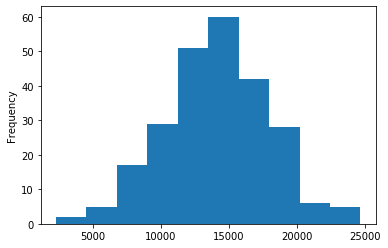

In [287]:
#plot the same histogram with matplotlib
data['Billable Month Volume'].plot.hist()
#show the plot
plt.show()

### TV Transaction processed Count vs Revenue

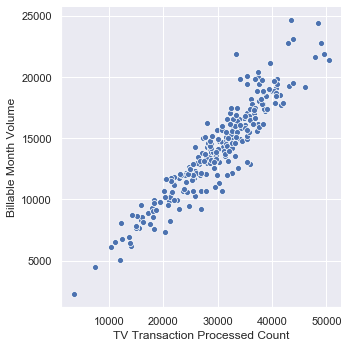

In [288]:
# TV Transaction processed Count vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="TV Transaction Processed Count", y="Billable Month Volume", data=data);

### Service visit vs Revenue

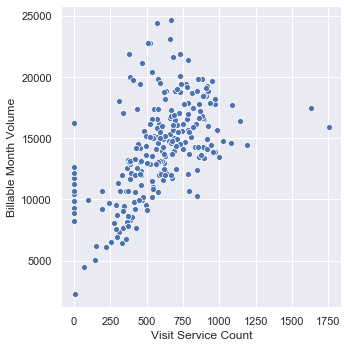

In [289]:
# Service vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="Visit Service Count", y="Billable Month Volume", data=data);

### Transaction fee vs Revenue

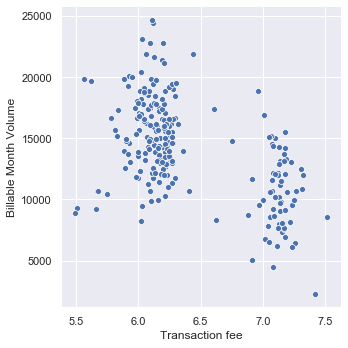

In [292]:
# Transction fee vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="Transaction fee", y="Billable Month Volume", data=data);

### Revenue over time

In [299]:
#Create Year columns
datab['year'] = pd.DatetimeIndex(datab['date']).year

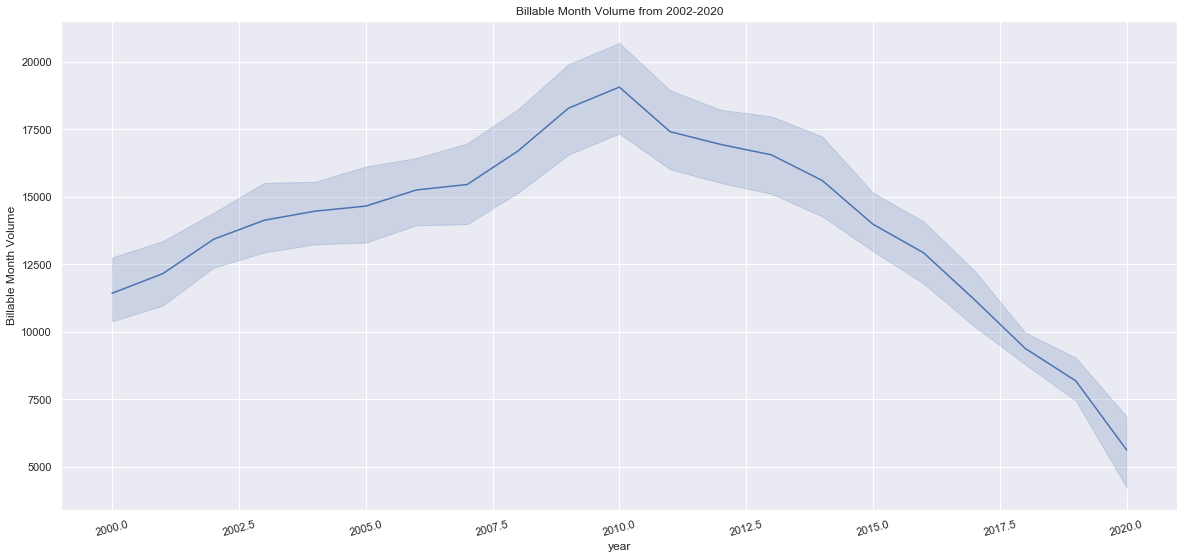

In [300]:
# Revenue 
sns.lineplot(x="year", y="Billable Month Volume", data=datab)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Billable Month Volume from 2002-2020')
plt.show()


### Velocity over time

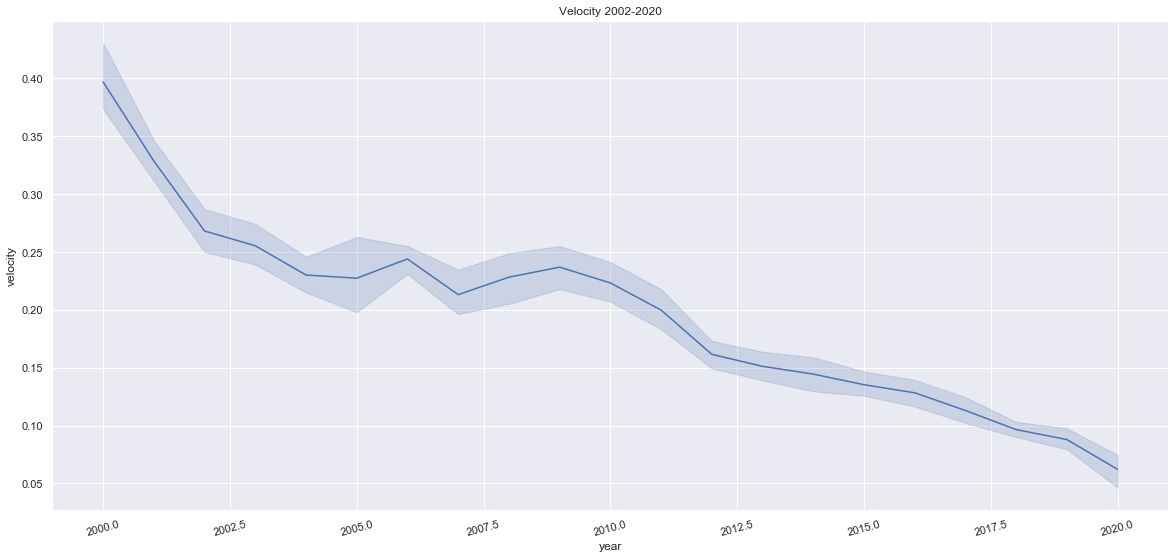

In [303]:
# Velocity
sns.lineplot(x="year", y="velocity", data=datab)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Velocity 2002-2020')
plt.show()


### Total accounts

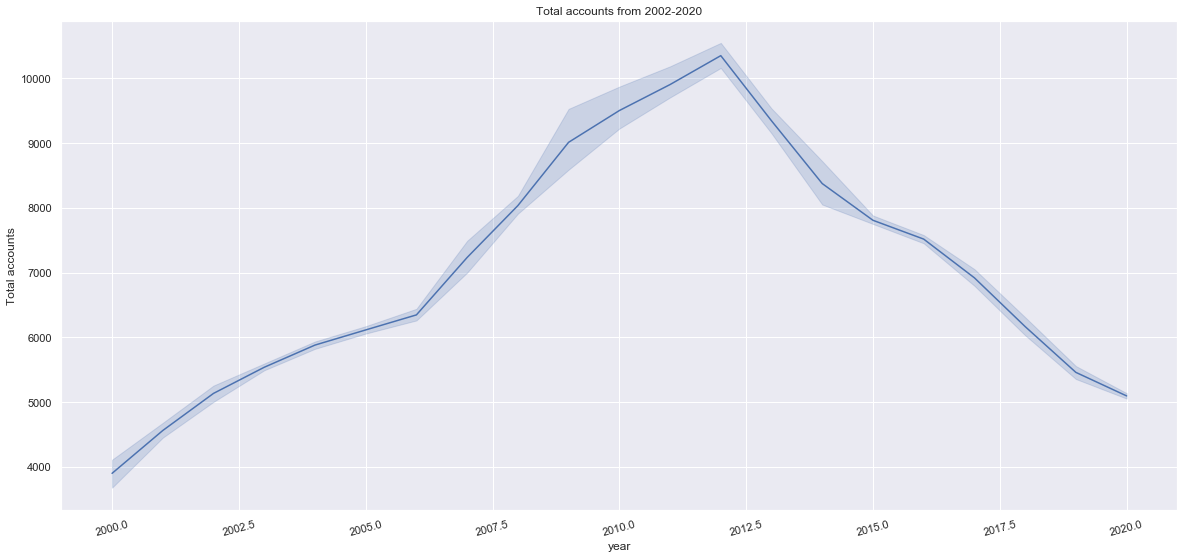

In [304]:
# Total account
sns.lineplot(x="year", y="Total accounts", data=datab)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Total accounts from 2002-2020')
plt.show()

### Transaction fee

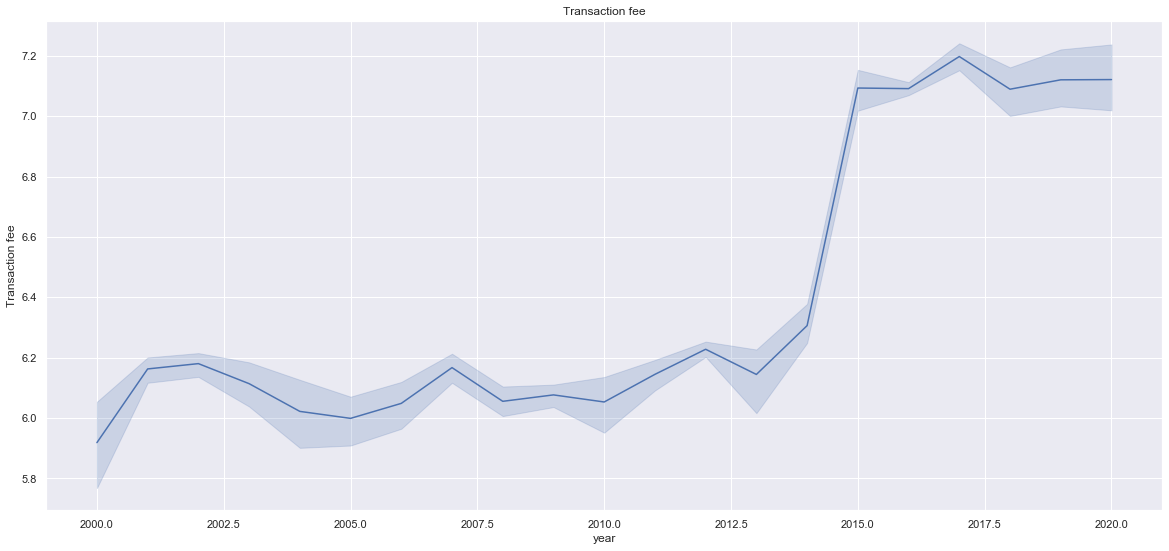

In [305]:
# Transaction fee
sns.lineplot(x="year", y="Transaction fee", data=datab)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Transaction fee')
plt.show()

### All variables in one graph with MinMax Scaler

In [314]:
#Get MinMaxScaler
scaler = MinMaxScaler()
#Extract our independents
df_g=data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume']]=scaler.fit_transform(data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume']])
#Extract date
df_t=datab[['year']]
#convert to dataframe
df_g2 = pd.DataFrame({'TV Transacion processed count': df_g[:, 0],'Total accounts': df_g[:, 1], 'Visit Service visit': df_g[:, 2],'Transaction fee': df_g[:, 3],'Billable Month Volume': df_g[:, 4]})
#merge 2 dataframe
con = pd.concat([df_t, df_g2], axis=1)


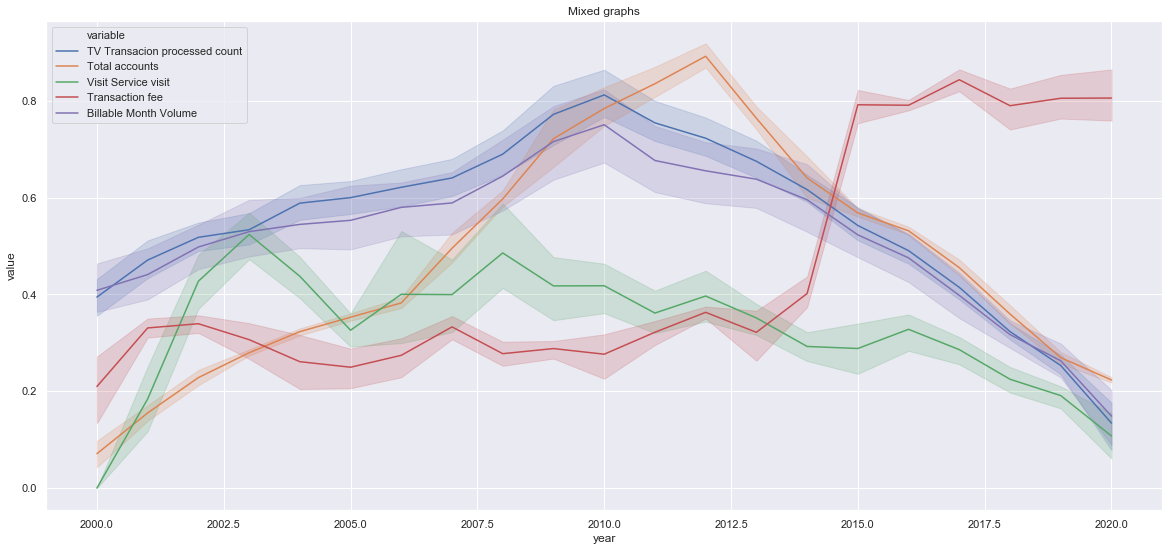

In [317]:
# Plot all variables in same scale
sns.lineplot(x='year', y='value', hue='variable', 
           data=pd.melt(con, ['year']))
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Mixed graphs')
plt.show()




Last we will look at pairpots for our variables

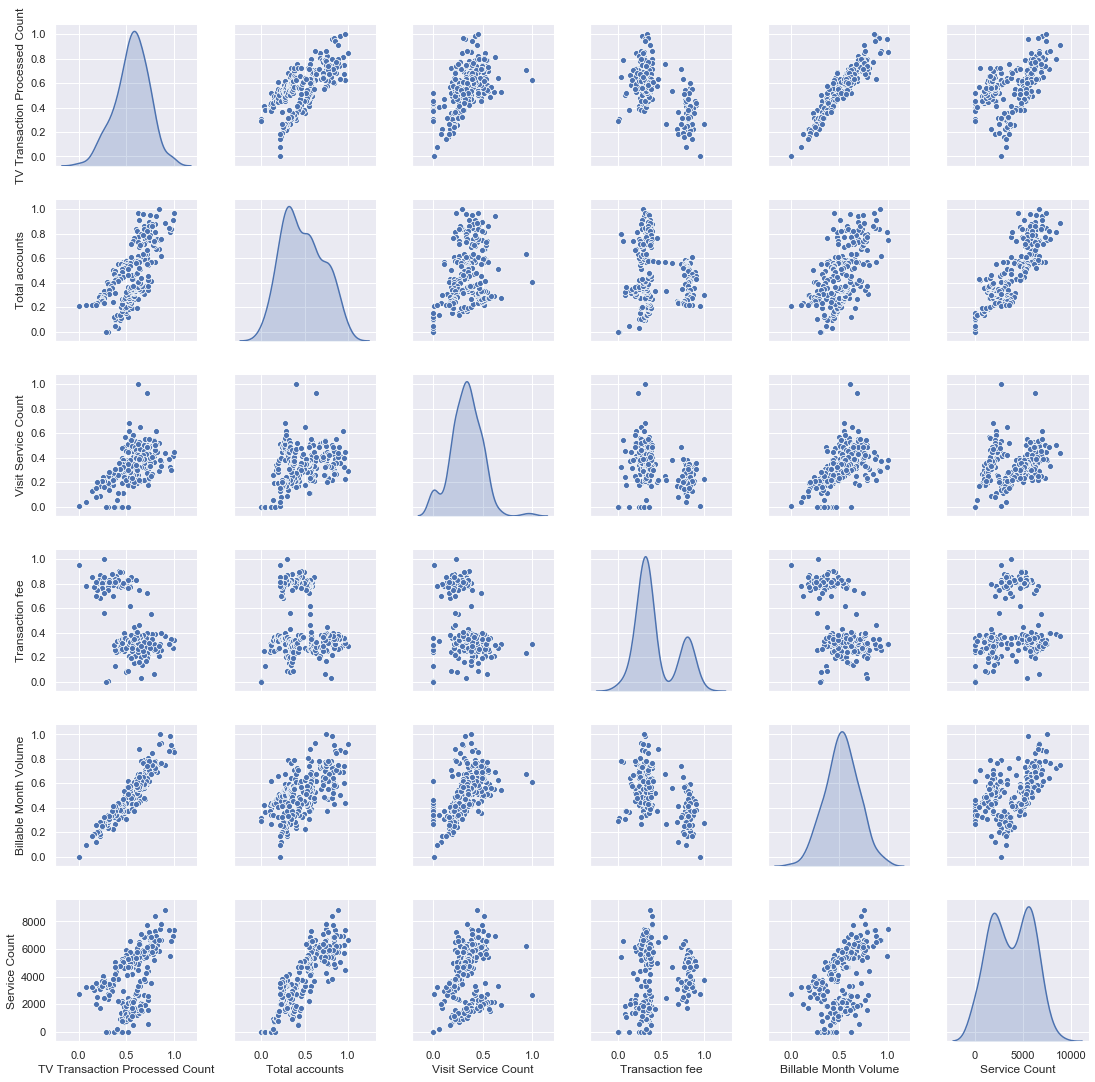

In [319]:
#Plot pairplot

sns.pairplot(data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume','Service Count']], diag_kind="kde")



# Step 3: Model Training

We will conduct 3 models:
1. Basic Linear regression
2. Deep learning with Keras regression
3. LSTM

## Model 1: Basic Linear Regression

In [812]:
# get data
data1=data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Service Count','Billable Month Volume']]
#check 2 rows
data1.head(2)

,TV Transaction Processed Count,Total accounts,Visit Service Count,Transaction fee,Service Count,Billable Month Volume
0,0.305260,0.000254,0.0,0.00815,0.0,0.313604
1,0.290336,0.000000,0.0,0.00000,0.0,0.295826


In [813]:
# Define independent variable
X=data1[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Service Count']]
#Define target variable
y=data1[['Billable Month Volume']]


We will run a loop of spot check of a number of different models to pick one

In [814]:
# Define a function for all types of models
def splotcheck(ml):
    if ml==0:
        model=LinearRegression()
    if ml==1:  
        model=Ridge()
    if ml==2:
         model=Lasso()
    if ml==3:
         model=ElasticNet()
    if ml==4:
         model=GradientBoostingRegressor()
    if ml==5:
         model=KNeighborsRegressor()
    if ml==6:
         model=DecisionTreeRegressor()
    if ml==7:    
         model=SVR()
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scoring = 'neg_mean_squared_error'
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print(results.mean()) 
    


In [815]:
# Loop through a few models to spotcheck
names=[]
train_scores =[]
test_scores =[]

models={'0': 'LinearRegression',
       '1': 'Ridge',
       '2': 'Lasso',
       '3': 'ElasticNet',
       '4': 'GradientBoostingRegressor',
       '5': 'KNeighborsRegressor',
        '6':'DecisionTreeRegressor',
        '7':'SVR',
        
       }
i=0
for model in models:
  
    print ("MSE of",models[model],"is")
    splotcheck(i)
    i=i+1;
    

MSE of LinearRegression is
-0.0031491089334498962
MSE of Ridge is
-0.004650349622916514
MSE of Lasso is
-0.026671042053293088
MSE of ElasticNet is
-0.02667292969071646
MSE of GradientBoostingRegressor is
-0.006504445115019709
MSE of KNeighborsRegressor is
-0.02246068770072477
MSE of DecisionTreeRegressor is
-0.008258590832735046
MSE of SVR is
-0.023666324532879115


As linear regression has no parameters, there is no way to control the complexity of the model. We’ll explore Ridge regression that add regularization below.

### Model development


In [816]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#pick Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_test['predict']=y_pred

In [817]:
#calcualte MSE error
y_test['error']=mean_squared_error_custom(y_test['Billable Month Volume'],y_test['predict'])

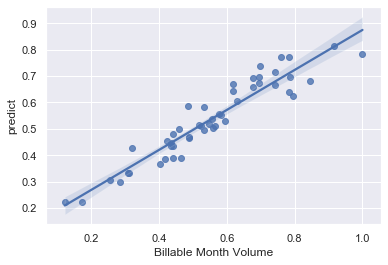

In [818]:
# Plot predict vs real
sns.regplot(x="Billable Month Volume", y="predict", data=y_test);

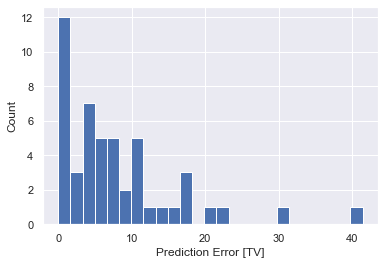

In [819]:
#Let's take a look at the error distribution.
error = abs((test_predictions - test_labels)/test_predictions*100)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [TV]")
_ = plt.ylabel("Count")

In [824]:
# Convert to dataframe
error1=pd.DataFrame(data=error.flatten())
error1.describe()

,0
count,49.000000
mean,8.044945
std,8.283881
min,0.000460
25%,2.328697
50%,5.436818
75%,10.896220
max,41.432577


Evaluation Metric: R²
R-Squared, or the coefficient of determination, is how much variance in the target variable that is explained by our model.
Values can range from 0 to 1. Higher values indicate a model that is highly predictive. For example, a R² value of 0.80 means that the model is accounting for 80% of the variability in the data.
In general, the higher the R² value the better. Low values indicate that our model is not very good at predicting the target. One caution, however, is that a very high R² could be a sign of overfitting.
We’ll use the following function to get cross validation scores for our models:

In [825]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [826]:
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)


CV Mean:  0.8313092557628803
STD:  0.05236141861982702




We get a R² value of 0.83 and standard deviation of 0.08. The high R² value indicates that our model is accurate. The standard deviation value indicates we may be overfitting the training data.

### Model Tunning

Let’s see if we can improve the R² score by adjusting our alpha value. We’ll use grid search to find an optimal alpha value:

In [827]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.8859769490398783
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s finished


## Model 2: Deep learning with Keras Regression

In [828]:
# check Tensorflow version

print(tf.__version__)

1.14.0


In [829]:
# get data
dataset=datab[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Service Count','Billable Month Volume']]
#check 2 rows
dataset.tail(2)

,TV Transaction Processed Count,Total accounts,Visit Service Count,Transaction fee,Service Count,Billable Month Volume
243,10369,5072,220.0,7.227871,3281.0,6135.883593
244,12323,5057,272.0,7.147580,3550.0,8053.952985


In [830]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [831]:
# Split features from labels
train_labels = train_dataset.pop('Billable Month Volume')
test_labels = test_dataset.pop('Billable Month Volume')
train_dataset.head(2)

,TV Transaction Processed Count,Total accounts,Visit Service Count,Transaction fee,Service Count
92,40836,7827,881.0,6.098375,7305.0
238,12063,5165,142.0,6.910896,2048.0


In [832]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_dataset.shape[1]

#add model layers
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [833]:
# Define a function for model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [834]:
#build model
model = build_model()
#get summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [835]:
#Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-3783.2952],
       [-1431.6547],
       [-2355.1396],
       [-2401.0103],
       [-2989.9622],
       [-3166.693 ],
       [-3957.7222],
       [-3846.351 ],
       [-3224.565 ],
       [-2427.6711]], dtype=float32)

In [836]:
EPOCHS = 200

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:197136721.0256,  mean_absolute_error:13357.4053,  mean_squared_error:197136720.0000,  val_loss:106729444.8000,  val_mean_absolute_error:9940.7383,  val_mean_squared_error:106729448.0000,  
....................................................................................................
Epoch: 100, loss:1749504.7724,  mean_absolute_error:1021.0772,  mean_squared_error:1749504.8750,  val_loss:1354027.3250,  val_mean_absolute_error:901.1530,  val_mean_squared_error:1354027.2500,  
....................................................................................................

In [837]:
#Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
195,1.693183e+06,1000.928467,1693183.250,1.072845e+06,826.416809,1072844.750,195
196,1.996160e+06,1100.572876,1996160.375,1.213320e+06,866.357300,1213319.625,196
197,1.637828e+06,965.950012,1637827.875,1.162167e+06,848.840820,1162167.250,197
198,1.959330e+06,1017.807373,1959330.250,1.082050e+06,836.677368,1082050.250,198
199,1.692950e+06,995.265930,1692950.375,1.058498e+06,819.440247,1058497.625,199


Text(0, 0.5, 'MSE [Billable Month Volume]')

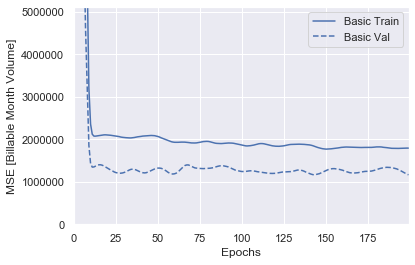

In [838]:
#Plot metric MAE
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 5117118])
plt.ylabel('MSE [Billable Month Volume]')

### Model Tunning

Let try to increase EPOCHS to find the best result

In [839]:
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1652251.5449,  mean_absolute_error:990.6789,  mean_squared_error:1652251.5000,  val_loss:1121842.0750,  val_mean_absolute_error:840.6317,  val_mean_squared_error:1121842.1250,  
....................................................................................................
Epoch: 100, loss:1635441.0032,  mean_absolute_error:961.9852,  mean_squared_error:1635441.0000,  val_loss:1117430.2000,  val_mean_absolute_error:858.9022,  val_mean_squared_error:1117430.2500,  
....................................................................................................
Epoch: 200, loss:1698844.7821,  mean_absolute_error:982.1714,  mean_squared_error:1698844.7500,  val_loss:1273789.3500,  val_mean_absolute_error:933.8732,  val_mean_squared_error:1273789.3750,  
....................................................................................................
Epoch: 300, loss:1615088.8045,  mean_absolute_error:961.9403,  mean_squared_error:1615088.8750,  val_loss:1283924

Text(0, 0.5, 'MSE [Billable Month Volume]')

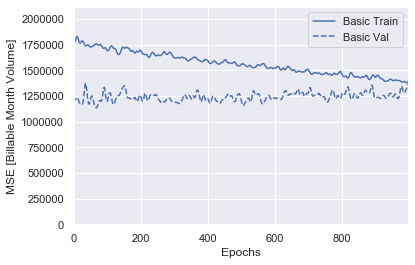

In [840]:
#Plot metric MAE
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 2117118])
plt.ylabel('MSE [Billable Month Volume]')

In [841]:
#Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.340966e+06,885.024353,1340966.125,1.221784e+06,902.144165,1221783.750,995
996,1.349127e+06,898.684692,1349126.875,1.264447e+06,892.773254,1264447.375,996
997,1.440568e+06,895.204712,1440568.250,1.477278e+06,975.060669,1477278.000,997
998,1.511108e+06,932.551270,1511108.500,1.413520e+06,974.291504,1413520.125,998
999,1.335210e+06,862.857666,1335210.000,1.446802e+06,977.069153,1446802.000,999


### Make prediction with EPOCHS=200

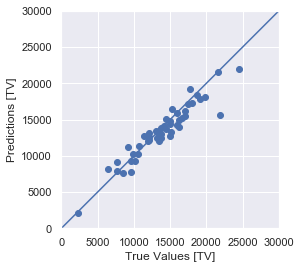

In [842]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [TV]')
plt.ylabel('Predictions [TV]')
lims = [0, 30000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


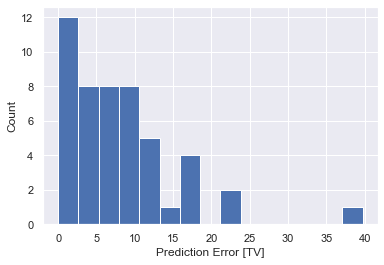

In [843]:
#Let's take a look at the error distribution.
error = abs((test_predictions - test_labels)/test_predictions*100)
plt.hist(error, bins = 15)
plt.xlabel("Prediction Error [TV]")
_ = plt.ylabel("Count")

In [845]:
# Save as error 2 for evaluatate
error2=error
error2.describe()

count    49.000000
mean      8.047981
std       7.454279
min       0.006870
25%       2.855936
50%       6.163271
75%      11.257602
max      39.736748
Name: Billable Month Volume, dtype: float64

## Model 3: LSTM
In this model, we will focus on Long Short-term Memory (LSTM) method, which is a quite popular one if you want to use Deep Learning. We will use Keras in our project to implement LSTM.

In [846]:
# Load data
df_sales=datab[['date','Billable Month Volume']]
df_sales.head()

,date,Billable Month Volume
0,2000-02-01,9303.622659
1,2000-04-01,8906.479081
2,2000-05-01,11764.336050
3,2000-06-01,10426.582200
4,2000-07-01,11802.715630


#### Data Transformation
To model our forecast easier and more accurate, we will do the transformations below:
We will convert the data to stationary if it is not
Converting from time series to supervised for having the feature set of our LSTM model
Scale the data
First off, how do we check if the data is not stationary? Let’s plot it and see:

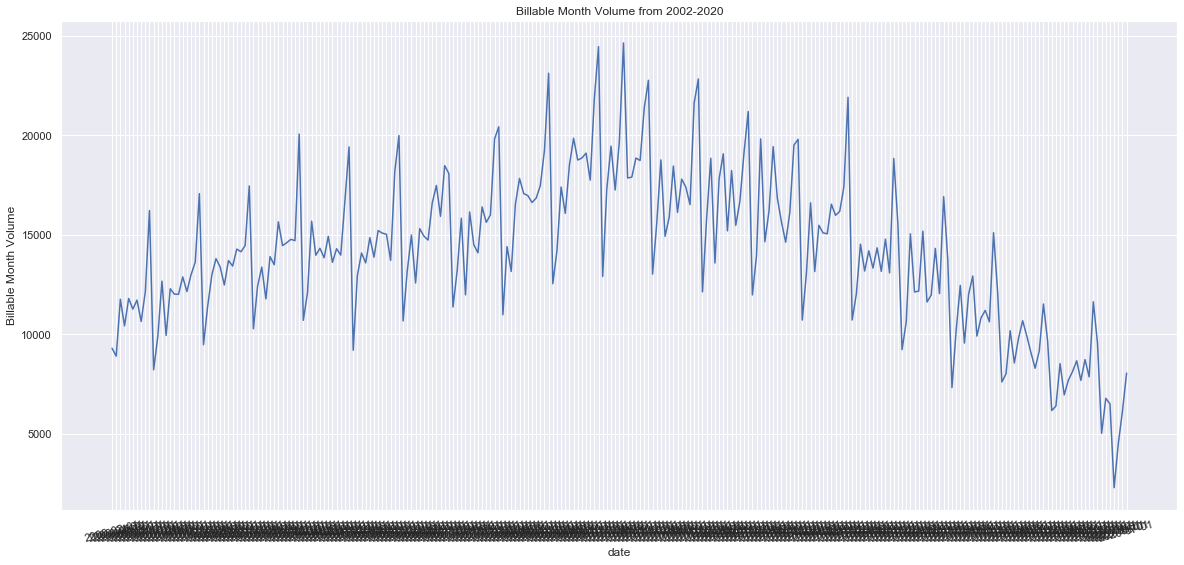

In [847]:
#plot monthly sales
# Revenue 
sns.lineplot(x="date", y="Billable Month Volume", data=df_sales)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Billable Month Volume from 2002-2020')
plt.show()


Obviously, it is not stationary and has an increasing trend over the months. One method is to get the difference in sales compared to the previous month and build the model on it:

In [848]:
#create a new dataframe to model the difference
df_diff = df_sales.copy()
#add previous sales to the next row
df_diff['prev_Billable Month Volume'] = df_diff['Billable Month Volume'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['Billable Month Volume'] - df_diff['prev_Billable Month Volume'])
df_diff.head(10)

,date,Billable Month Volume,prev_Billable Month Volume,diff
1,2000-04-01,8906.479081,9303.622659,-397.143578
2,2000-05-01,11764.336050,8906.479081,2857.856969
3,2000-06-01,10426.582200,11764.336050,-1337.753850
4,2000-07-01,11802.715630,10426.582200,1376.133430
5,2000-08-01,11270.974490,11802.715630,-531.741140
6,2000-09-01,11721.311080,11270.974490,450.336590
7,2000-10-01,10648.847650,11721.311080,-1072.463430
8,2000-11-01,12139.949180,10648.847650,1491.101530
9,2000-12-01,16216.476180,12139.949180,4076.527000
10,2001-01-01,8221.786880,16216.476180,-7994.689300


We plot again

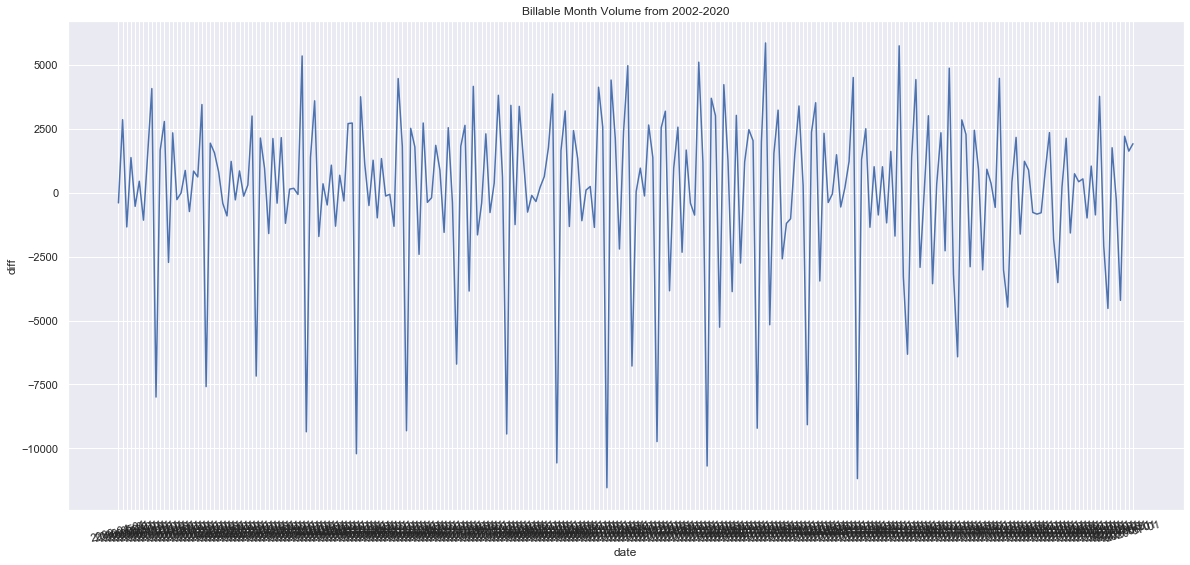

In [849]:
# Revenue 
sns.lineplot(x="date", y="diff", data=df_diff)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Billable Month Volume from 2002-2020')
plt.show()


Perfect! Now we can start building our feature set. We need to use previous monthly sales data to forecast the next ones. The look-back period may vary for every model. Ours will be 12 for this example.
So what we need to do is to create columns from lag_1 to lag_12 and assign values by using shift() method:

In [850]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_Billable Month Volume'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [851]:
df_supervised.head()

,date,Billable Month Volume,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2001-04-01,9945.786319,-2725.983301,2788.281880,1661.700860,-7994.689300,4076.527000,1491.10153,-1072.46343,450.33659,-531.74114,1376.13343,-1337.75385,2857.856969,-397.143578
1,2001-05-01,12290.000970,2344.214651,-2725.983301,2788.281880,1661.700860,-7994.689300,4076.52700,1491.10153,-1072.46343,450.33659,-531.74114,1376.13343,-1337.753850,2857.856969
2,2001-06-01,12020.536600,-269.464370,2344.214651,-2725.983301,2788.281880,1661.700860,-7994.68930,4076.52700,1491.10153,-1072.46343,450.33659,-531.74114,1376.133430,-1337.753850
3,2001-07-01,12012.637400,-7.899200,-269.464370,2344.214651,-2725.983301,2788.281880,1661.70086,-7994.68930,4076.52700,1491.10153,-1072.46343,450.33659,-531.741140,1376.133430
4,2001-08-01,12885.700130,873.062730,-7.899200,-269.464370,2344.214651,-2725.983301,2788.28188,1661.70086,-7994.68930,4076.52700,1491.10153,-1072.46343,450.336590,-531.741140


How useful are our features for prediction?
Basically, we fit a linear regression model (OLS — Ordinary Least Squares) and calculate the Adjusted R-squared. For the example above, we just used lag_1 to see how much it explains the variation in column diff. The output of this code block is:

In [852]:
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.12220097279547792


lag_1 explains 12% of the variation. Let’s check out others:

In [853]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.7871411344353167


Adding four more features increased the score from 12% to 78%.
We will split our data into train and test sets. As the test set, we have selected the last 6 months’ sales.

In [854]:
df_model = df_supervised.drop(['Billable Month Volume','date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

As the scaler, we are going to use MinMaxScaler, which will scale each future between -1 and 1:

In [855]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

### Building the LSTM model

In [856]:
#Split train and test data
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [857]:
# Fit our model
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
226/226 [==============================] - 1s 4ms/step - loss: 0.1844
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.1126
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 10/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0325
Epoch 11/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 12/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 13/100


226/226 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 100/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0169


In [858]:
# Lets test prediction
y_pred = model.predict(X_test,batch_size=1)


In [859]:
y_test

array([[ 0.52871488],
       [ 0.29435024],
       [-0.15759127],
       [ 0.58029864],
       [ 0.51353644],
       [ 0.54681754]])

In [860]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

In [861]:
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))

[[ 0.65711504 -0.19366013  0.08709368  0.75980392  0.22679495  0.44628565
   0.21305411  0.38879998  0.37603859  0.41171019  0.14549241  0.57155183
   0.35231177]]
[[ 0.49126425  0.52871488 -0.19366013  0.08709368  0.75980392  0.22679495
   0.44628565  0.21305411  0.38879998  0.37603859  0.41171019  0.14549241
   0.57155183]]
[[ 0.40982798  0.29435024  0.52871488 -0.19366013  0.08709368  0.75980392
   0.22679495  0.44628565  0.21305411  0.38879998  0.37603859  0.41171019
   0.14549241]]
[[ 0.7248233  -0.15759127  0.29435024  0.52871488 -0.19366013  0.08709368
   0.75980392  0.22679495  0.44628565  0.21305411  0.38879998  0.37603859
   0.41171019]]
[[ 0.44636628  0.58029864 -0.15759127  0.29435024  0.52871488 -0.19366013
   0.08709368  0.75980392  0.22679495  0.44628565  0.21305411  0.38879998
   0.37603859]]
[[ 0.20660275  0.51353644  0.58029864 -0.15759127  0.29435024  0.52871488
  -0.19366013  0.08709368  0.75980392  0.22679495  0.44628565  0.21305411
   0.38879998]]


In [862]:
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

In [863]:
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [864]:
df_sales.rename(columns={'Billable Month Volume':'sales'}, inplace=True)

df_sales.head()

,date,sales
0,2000-02-01,9303.622659
1,2000-04-01,8906.479081
2,2000-05-01,11764.336050
3,2000-06-01,10426.582200
4,2000-07-01,11802.715630


In [865]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_sales[-7:].date)
act_sales = list(df_sales[-7:].sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [866]:
#merge with actual sales dataframe
df_sales_pred = pd.merge(df_sales,df_result,on='date',how='left')

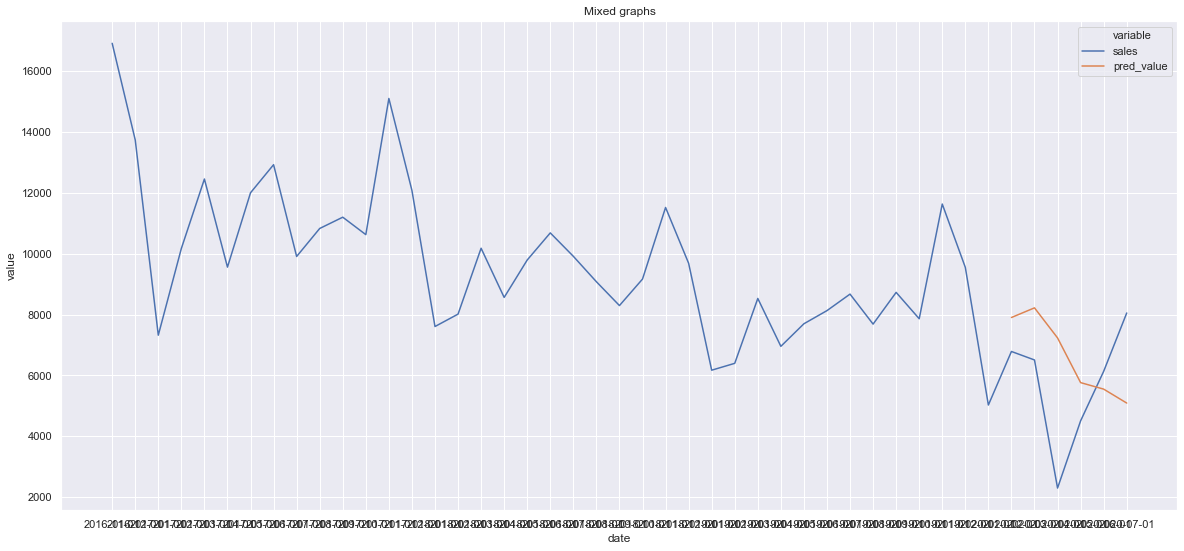

In [867]:
# Lets plot from 2018
df_sales_pred2=df_sales_pred.iloc[200:,]
sns.lineplot(x='date', y='value', hue='variable', 
           data=pd.melt(df_sales_pred2, ['date']))
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Mixed graphs')
plt.show()

Looks not so good for a simple model, especially given the COVID situation and NZ came out of lockdown pretty quickly to support this increase in from May to July

In [868]:
# Get table to calculate error
temp=df_sales_pred[['sales','pred_value']]
temp=temp.dropna()
temp.head()

,sales,pred_value
239,6788.866860,7906.0
240,6509.895810,8223.0
241,2298.004410,7235.0
242,4507.435560,5765.0
243,6135.883593,5551.0


In [869]:
#Calculate MSE columns
temp['error']=abs((temp['pred_value']-temp['sales'])/temp['sales']*100)

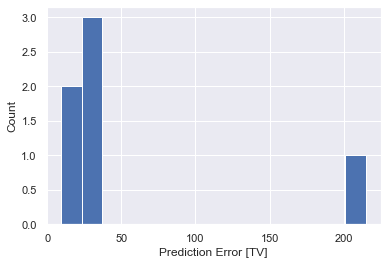

In [870]:
#Let's take a look at the error distribution.
error = temp['error']
plt.hist(error, bins = 15)
plt.xlabel("Prediction Error [TV]")
_ = plt.ylabel("Count")

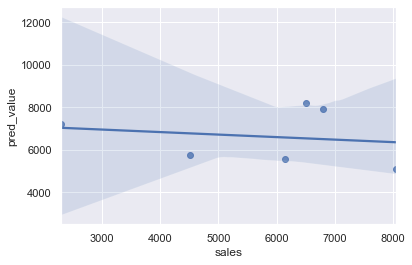

In [871]:
# Lets plot our result
sns.regplot(x="sales", y="pred_value", data=temp);

### Model Tunning

As March we have lockdown we will remove it from our training data
Remove April

In [1064]:
# Load data
df_sales=datab[['date','Billable Month Volume']]
df_sales.tail(10)

,date,Billable Month Volume
235,2019-10-01,7865.143700
236,2019-11-01,11636.679540
237,2019-12-01,9554.104435
238,2020-01-01,5028.331848
239,2020-02-01,6788.866860
240,2020-03-01,6509.895810
241,2020-04-01,2298.004410
242,2020-05-01,4507.435560
243,2020-06-01,6135.883593
244,2020-07-01,8053.952985


In [1065]:
#remove from April
df_sales=df_sales.iloc[:238,]

In [1067]:
df_sales.tail()

,date,Billable Month Volume
233,2019-08-01,7688.786680
234,2019-09-01,8731.999660
235,2019-10-01,7865.143700
236,2019-11-01,11636.679540
237,2019-12-01,9554.104435


In [1068]:
#create a new dataframe to model the difference
df_diff = df_sales.copy()
#add previous sales to the next row
df_diff['prev_Billable Month Volume'] = df_diff['Billable Month Volume'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['Billable Month Volume'] - df_diff['prev_Billable Month Volume'])
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_Billable Month Volume'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [1069]:
df_model = df_supervised.drop(['Billable Month Volume','date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [1070]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [1071]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [1072]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.1460
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 12/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 13/100


In [1074]:
y_pred = model.predict(X_test,batch_size=1)

#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
    #reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)


[[ 0.10564743  0.37603859  0.41171019  0.14549241  0.57155183  0.35231177
  -0.07757445  0.11560356  0.59693941  0.42650459  0.23633674  0.23034317
   0.23795297]]
[[ 0.16284756  0.38879998  0.37603859  0.41171019  0.14549241  0.57155183
   0.35231177 -0.07757445  0.11560356  0.59693941  0.42650459  0.23633674
   0.23034317]]
[[ 0.24001758  0.21305411  0.38879998  0.37603859  0.41171019  0.14549241
   0.57155183  0.35231177 -0.07757445  0.11560356  0.59693941  0.42650459
   0.23633674]]
[[ 0.28336352  0.44628565  0.21305411  0.38879998  0.37603859  0.41171019
   0.14549241  0.57155183  0.35231177 -0.07757445  0.11560356  0.59693941
   0.42650459]]
[[ 0.60983711  0.22679495  0.44628565  0.21305411  0.38879998  0.37603859
   0.41171019  0.14549241  0.57155183  0.35231177 -0.07757445  0.11560356
   0.59693941]]
[[ 0.11300303  0.75980392  0.22679495  0.44628565  0.21305411  0.38879998
   0.37603859  0.41171019  0.14549241  0.57155183  0.35231177 -0.07757445
   0.11560356]]


In [1075]:
df_sales.rename(columns={'Billable Month Volume':'sales'}, inplace=True)


#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_sales[-7:].date)
act_sales = list(df_sales[-7:].sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [1076]:
#merge with actual sales dataframe
df_sales_pred = pd.merge(df_sales,df_result,on='date',how='left')

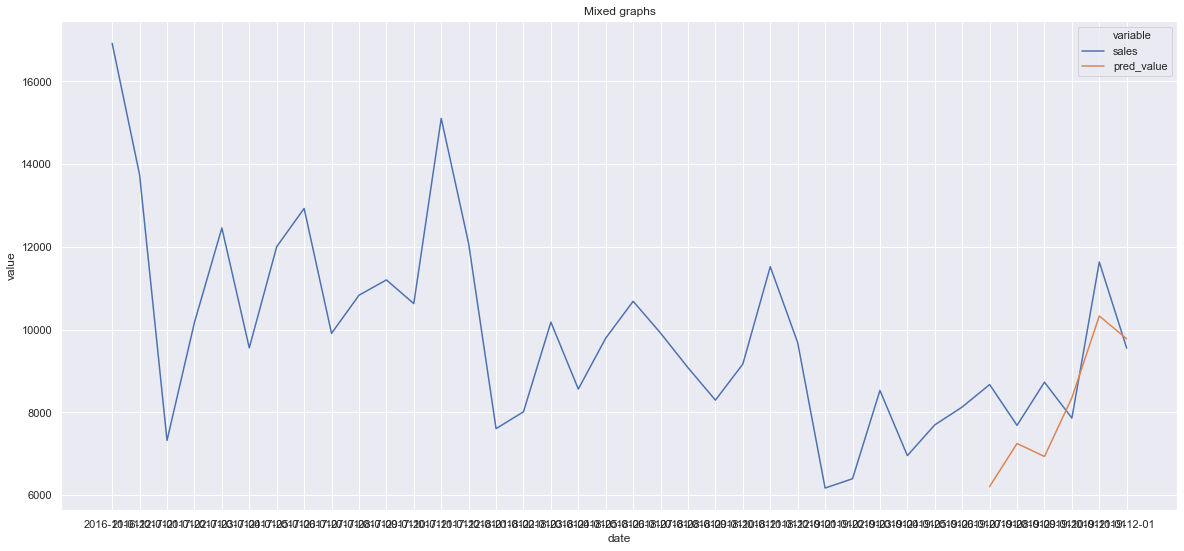

In [1077]:
# Lets plot from 2018
df_sales_pred2=df_sales_pred.iloc[200:,]
sns.lineplot(x='date', y='value', hue='variable', 
           data=pd.melt(df_sales_pred2, ['date']))
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Mixed graphs')
plt.show()

In [1078]:
# save it for later
error3=abs((temp['pred_value']-temp['sales'])/temp['sales']*100)
error3.describe()

count      6.000000
mean      55.300845
std       78.728089
min        9.532182
25%       18.920374
50%       27.107581
75%       34.547923
max      214.838386
dtype: float64

Looking better just by remove one outliner!


# Step 4: Model Evaluation
As this is a regression model and predicting revenue, we will use Sum of Differences to find out which model performs better

We will compare last 6 months - due to LTSM we only forecast 6 months

In [1079]:
e1=error1
# Get last 6 results
e1=error1.iloc[-6:]
e1.columns=['Model 1']

In [1080]:
# Get last 6 results
e2=error2.to_frame().iloc[-6:]
# rename to model 3
e2.rename(columns={'Billable Month Volume':'Model 2'}, inplace=True)

In [1081]:
# Get last 6 results
e3=error3.to_frame().iloc[-6:]
# rename to model 3
e3.columns=['Model 3']

In [1082]:
#Reset index
e1.reset_index(drop=True, inplace=True)
e2.reset_index(drop=True, inplace=True)
e3.reset_index(drop=True, inplace=True)

In [1083]:
# Merge togheter
ec = pd.concat([e1, e2,e3], axis=1)
# Print error table
ec

,Model 1,Model 2,Model 3
0,0.163983,11.881223,16.455370
1,17.251790,22.233598,26.315386
2,16.335028,16.173267,214.838386
3,4.384033,2.855936,27.899776
4,21.021441,22.023049,9.532182
5,30.255797,12.061276,36.763972


In [1084]:
#Summ of the diffence of errors:
ec.sum(axis = 0, skipna = True) 

Model 1     89.412072
Model 2     87.228348
Model 3    331.805072
dtype: float64

# Step 5: Model Selection

#### As we can see above Model 2 has the best result.
So we will chose Model 2

# Step 6: Final result

## ANSWER

### 5. Can we predict revenue next 6 months?
Yes we can predict next 6 months revenue with
input = 
TV Transaction Processed Count,
Service visit
Visit Service count 
Total accounts 
Transaction fee

So we can clearly increase number of service visit to improve revenue or
reduce transaction fee to increase revenue